### **1. Project Introduction**
This notebook introduces the *Retail RFM Segmentation* analysis.  
It demonstrates an end‑to‑end process of cleaning an e‑commerce dataset, extracting customer RFM metrics (Recency, Frequency, Monetary), performing clustering with K‑Means, and producing visual dashboards summarizing customer behavior.  
The project reflects practical Data Science workflow design — including modular preprocessing, unsupervised segmentation, and reporting automation.

### **2. Import Libraries and Project Modules**

Import common analytical libraries and local modules.  
All project scripts are contained in `../src/` and are dynamically loaded using `sys.path` to maintain modularity.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Project modules
import sys
sys.path.append('../src')

from preprocessing import load_data, clean_data, summarize_sales
from rfm_segmentation import compute_rfm, normalize_rfm, find_best_k, segment_customers, classify_active_inactive
from report_result import visualize_clusters, export_summary, plot_best_worst_days, plot_sales_distribution, plot_k_evaluation


### **3. Load and Clean Transactional Data**

Load the raw transactional dataset, perform cleaning (remove duplicates, handle missing values, filter invalid quantities), and create a consolidated field for total purchase amount per item.  
This prepares the data for both descriptive statistics and RFM transformation.

In [2]:
raw_data = load_data('../data/online_retail_II.csv')
clean_df = clean_data(raw_data)

# Inspect results
display(clean_df.head())
print(clean_df.info())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


<class 'pandas.core.frame.DataFrame'>
Index: 779495 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      779495 non-null  object        
 1   StockCode    779495 non-null  object        
 2   Description  779495 non-null  object        
 3   Quantity     779495 non-null  int64         
 4   InvoiceDate  779495 non-null  datetime64[ns]
 5   Price        779495 non-null  float64       
 6   Customer ID  779495 non-null  float64       
 7   Country      779495 non-null  object        
 8   TotalAmount  779495 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 59.5+ MB
None


### **4. Generate Initial Sales Statistics and Insights**

Compute and visualize key business indicators — number of unique customers, average purchase amount, yearly sales growth, and the highest/lowest sales days.  
This Exploratory Data Analysis (EDA) provides a general understanding of retail performance before segmentation.


Unique Customers: 5881
Average Sale: 22.29
Yearly Growth (%): {2010: 11.252299871656934, 2011: -0.006889003153435547}
Total Transactions: 779495


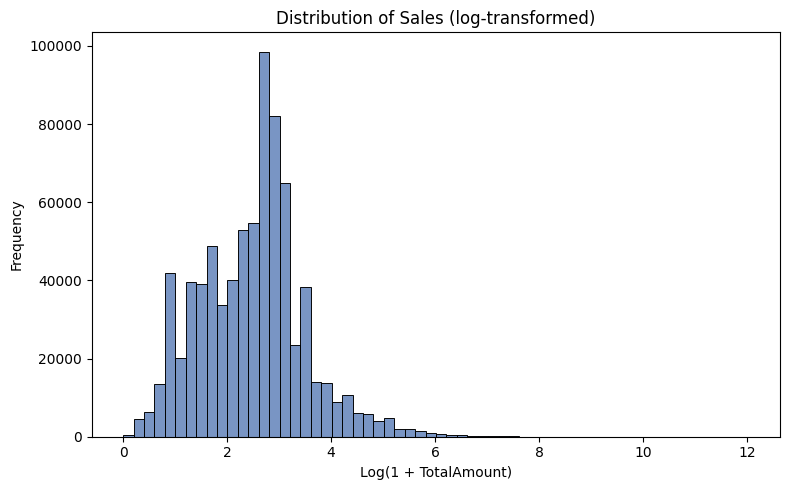

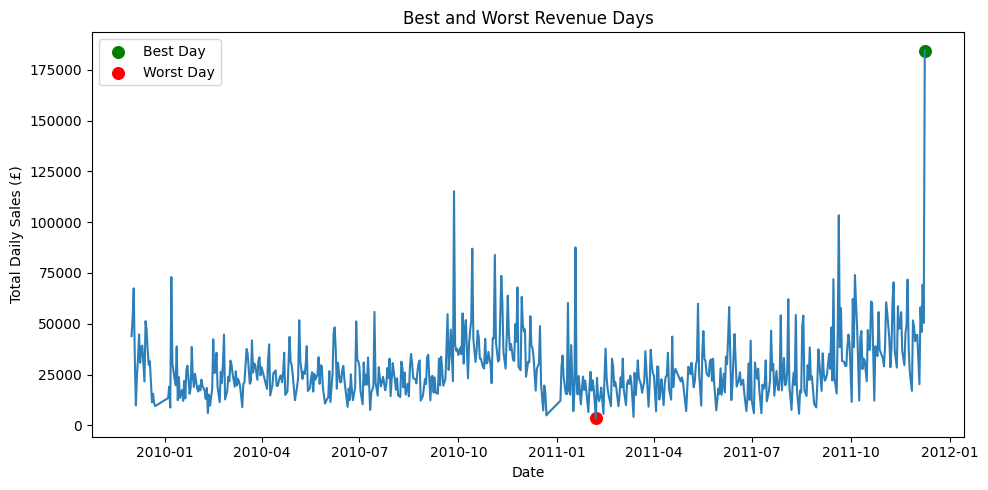

In [3]:
stats = summarize_sales(clean_df)

print("Unique Customers:", stats['unique_customers'])
print("Average Sale:", stats['avg_sales'])
print("Yearly Growth (%):", stats['yearly_growth'])
print("Total Transactions:", stats['total_transactions'])

plot_sales_distribution(clean_df)      
plot_best_worst_days(clean_df)         

### **5. Extract RFM Metrics per Customer**

Aggregate cleaned transactions by customer to compute Recency (days since last purchase), Frequency (total invoices), and Monetary (total sales).  
The resulting RFM table will serve as input for normalization and clustering.

In [4]:
rfm = compute_rfm(clean_df)

display(rfm.head())
print("RFM shape:", rfm.shape)

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,326,34,77556.46
12347.0,2,222,4921.53
12348.0,75,51,2019.40
12349.0,19,175,4428.69
12350.0,310,17,334.40


RFM shape: (5881, 3)


### **6. Determine Optimal Number of Clusters and Label Customers**

Normalize RFM data using log scaling and Min‑Max normalization.  
Run K‑Means for several values of k (2–10) and evaluate the Silhouette Score to select the optimal number of clusters.  
Assign labels to each customer accordingly.

Optimal K: 2


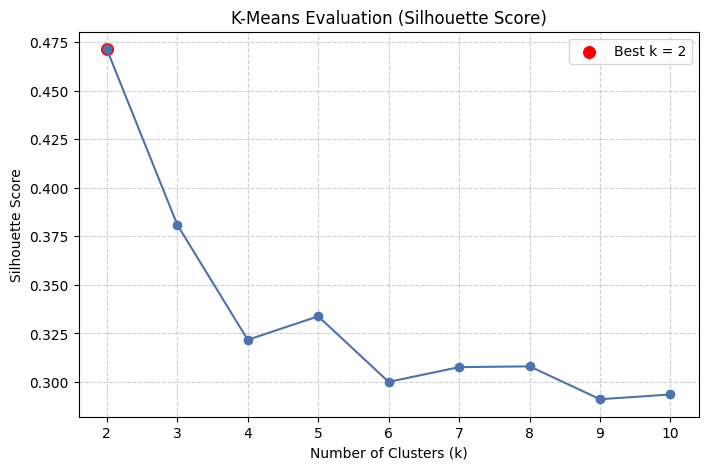

,Recency,Frequency,Monetary,Cluster,ActivityStatus
Customer ID,,,,,
12346.0,0.861894,0.327663,0.848279,1,True
12347.0,0.068566,0.539658,0.640542,0,False
12348.0,0.615132,0.372985,0.573446,0,False
12349.0,0.389378,0.512562,0.632593,0,False
12350.0,0.853411,0.251537,0.438149,1,True


In [5]:
rfm_scaled = normalize_rfm(rfm)
best_k, scores = find_best_k(rfm_scaled)
print("Optimal K:", best_k)

plot_k_evaluation(scores)

rfm_labeled = segment_customers(rfm_scaled, best_k)
rfm_labeled= classify_active_inactive(rfm=rfm_labeled)
display(rfm_labeled.head())

(Note): Can chose other K for marketing purpose

### **7. Visualize and Report Cluster Results**

Summarize and visualize segmentation outcomes.  
Create scatter plots or heatmaps showing customer distribution by Recency, Frequency, and Monetary values.  
Export final cluster summaries and plots to `/result/` directory for repository archiving.

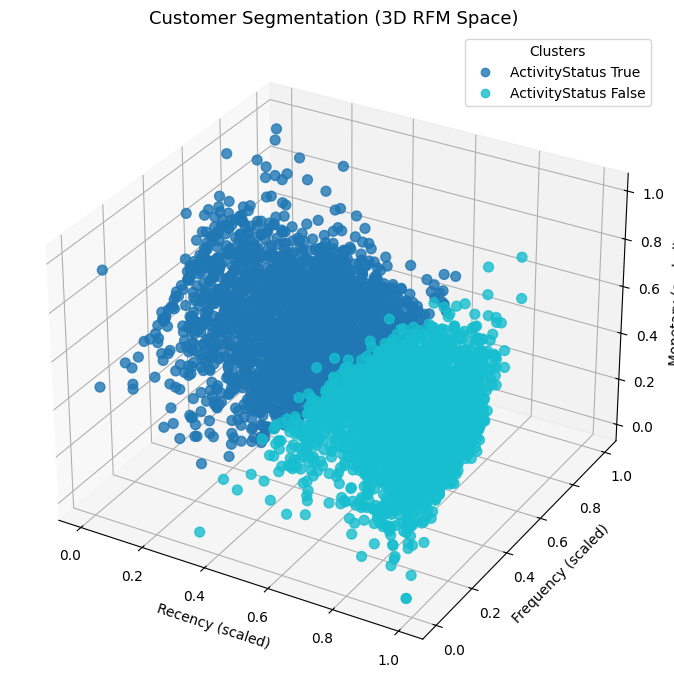

Cluster summary exported to: ../result/cluster_summary.csv


None

In [6]:
visualize_clusters(rfm_labeled)
cluster_summary = export_summary(rfm_labeled)

display(cluster_summary)

### **8. Closing Notes**
The notebook completes the full RFM segmentation pipeline —  
from raw retail data cleaning to unsupervised clustering and insight generation.  
Outputs include interpretable customer segments, distribution plots, and business summaries ready for visualization dashboards or marketing analytics integration.